# Community detection in the Southern Women network via OtrisymNMF

This dataset documents the participation of 18 women in 14 social events held in a Southern town in the United States. The bipartite network is composed of 32 nodes, 18 for women and 14 for events. An edge exists between a woman and an event if the woman attended that event.

In [25]:
import networkx as nx # useful python package for networks and graphs
G = nx.davis_southern_women_graph() # Get the Southern Women network
# Recovery of the women and events from node's graph
women = [n for n, d in G.nodes(data=True) if d['bipartite'] == 0]
events = [n for n, d in G.nodes(data=True) if d['bipartite'] == 1]

## Selecting the value of r, the number of communities

We aim to use OtrisymNMF to detect communities within the network. Since the number of communities r is unknown, we need to select a reasonable value for it.

To do this, we rely on the elbow method. This technique involves plotting the reconstruction error as a function of r, and identifying the point where the error reduction starts to level off — known as the elbow of the curve. Beyond this point, increasing r no longer significantly improves the reconstruction.

This approach allows us to choose a value of r that captures the general structure of the network while avoiding overfitting by adding unnecessary complexity.



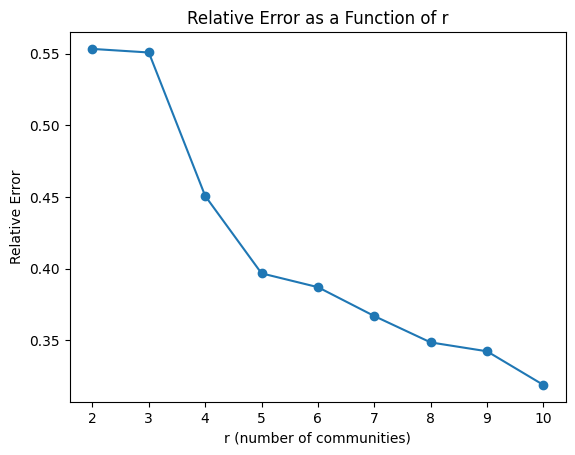

[0.5533760944223625, 0.5508872129551002, 0.4507398347507937, 0.39667422678076475, 0.38702548200093323, 0.3668656869908178, 0.3484493606078818, 0.34225017977299665, 0.3187672730209883]


In [31]:
import OtrisymNMF
import matplotlib.pyplot as plt
X = nx.adjacency_matrix(G) # adjacency matrix of the graph
errors=[]
r_listes=range(2,11)
for r in r_listes : # compute the factorization for different values of r
    w, v, S, error = OtrisymNMF.OtrisymNMF_CD(X,r,numTrials=20,verbosity=0)
    errors.append(error)
# Plot of the relative reconstruction error as a function of r
plt.plot(r_listes,errors,marker='o')
plt.title('Relative Error as a Function of r')
plt.xlabel('r (number of communities)')
plt.ylabel('Relative Error')
plt.show()
print(errors)

We choose r = 5, since the reconstruction error does not decrease significantly after this value.
## Community detection via OtrisymNMF with the chosen value of r
We detect the communities using OtrisymNMF with the selected value of r. Our method gives :
- v is a vector of length n (with n being the number of nodes) indicating the community index for each node.
- w is a vector of length n indicating the  importance of a node within its community.
- S describes interactions between the r communities.


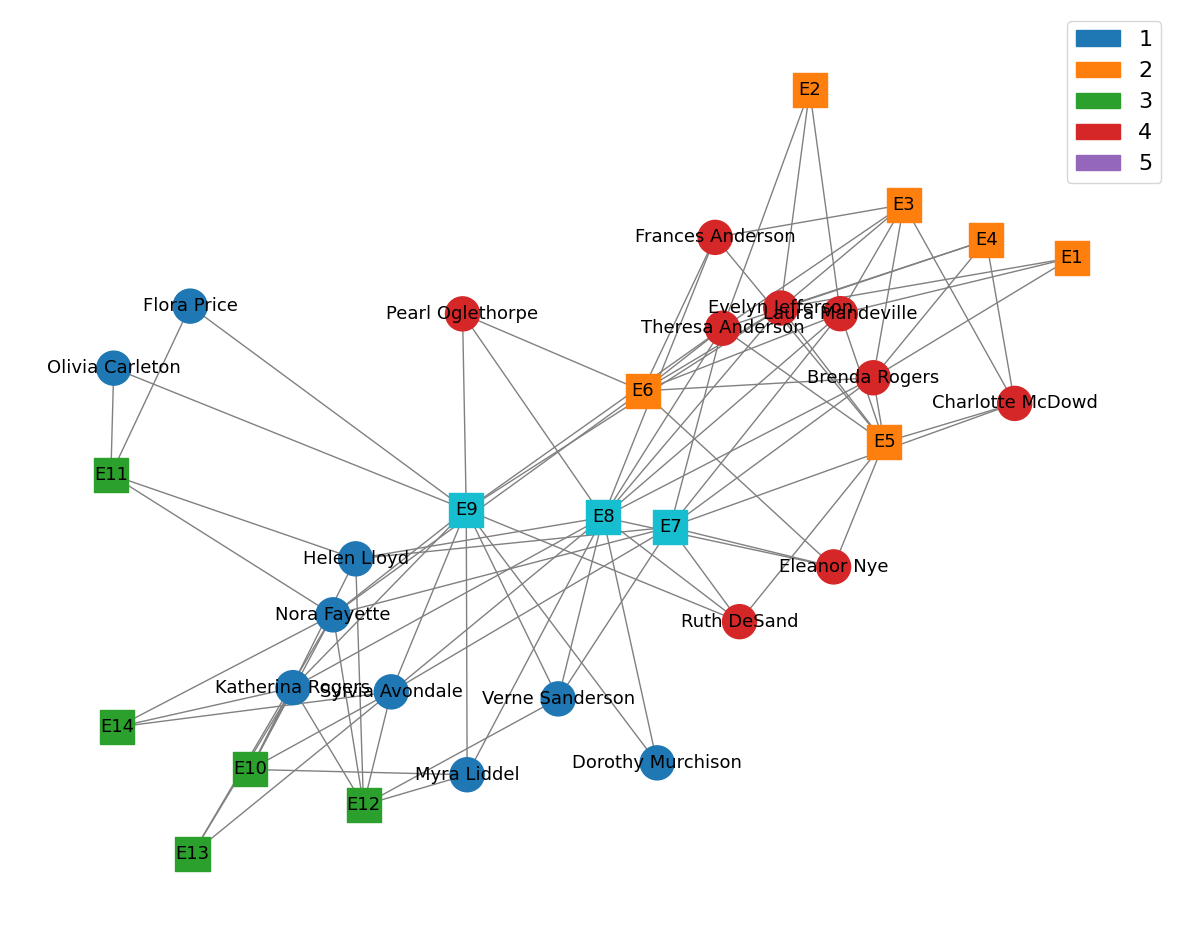

In [48]:
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import random
random.seed(45)
X = nx.adjacency_matrix(G) #adjacency matrix
w, v, S, error = OtrisymNMF.OtrisymNMF_CD(X,5,numTrials=10,verbosity=0)


# Graph Display with labels v
pos = nx.spring_layout(G, seed=12)

colors = list(mcolors.TABLEAU_COLORS.values())

node_list = list(G.nodes())
node_colors = [colors[v[i]-1] for i in range(len(node_list))]
plt.figure(figsize=(15,12))

nx.draw_networkx_nodes(G, pos,
                       nodelist=women,
                       node_color=[node_colors[node_list.index(n)] for n in women],
                       node_shape='o',
                       node_size=600)

nx.draw_networkx_nodes(G, pos,
                       nodelist=events,
                       node_color=[node_colors[node_list.index(n)] for n in events],
                       node_shape='s',
                       node_size=600)


nx.draw_networkx_edges(G, pos, edge_color='gray')


nx.draw_networkx_labels(G, pos, font_size=13)
legend_patches = []
for i in range(5):  # 5 communities
    patch = mpatches.Patch(color=colors[i], label=f'{i+1}')
    legend_patches.append(patch)

plt.legend(handles=legend_patches, loc='best', fontsize=16)
#plt.title("Southern Women Network")
plt.axis('off')
plt.show()

Community: 0: ['E7', 'E8', 'E9']
Community: 1: ['Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price']
Community: 2: ['E1', 'E2', 'E3', 'E4', 'E5', 'E6']
Community: 3: ['E10', 'E11', 'E12', 'E13', 'E14']
Community: 4: ['Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand']


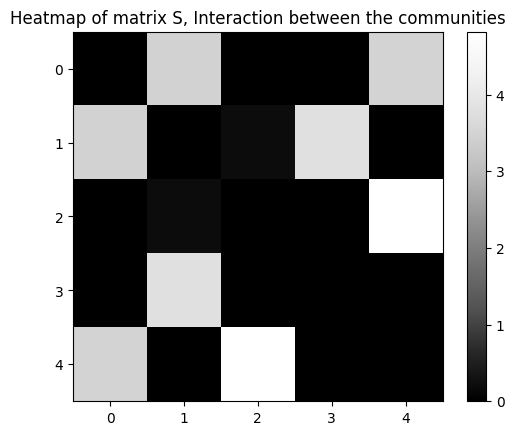

In [49]:
import numpy as np
for i in range(max(v)+1):
    index=np.where(v == i)[0]
    print(f"Community: {i}: {[list(G.nodes())[j] for j in index] }")

plt.imshow(S,cmap='Greys_r')
plt.colorbar()  # ajoute une barre de couleurs
plt.title("Heatmap of matrix S, Interaction between the communities")
plt.show()

In [29]:
import pysbm
from Utils import DC_BM
from sklearn.metrics import normalized_mutual_info_score as NMI

DCBM_partition=DC_BM(G,5,pysbm.DegreeCorrectedUnnormalizedLogLikelyhood,pysbm.KarrerInference, numTrials=5,verbosity=1,tri=False)
NMI(DCBM_partition,v)



Best logP : -735.3152336453757


1.0